In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('application_record.csv')

In [3]:
df.head()

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
1,5008805,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
2,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-21474,-1134,1,0,0,0,Security staff,2.0
3,5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0
4,5008809,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0


<AxesSubplot:xlabel='DAYS_BIRTH', ylabel='DAYS_EMPLOYED'>

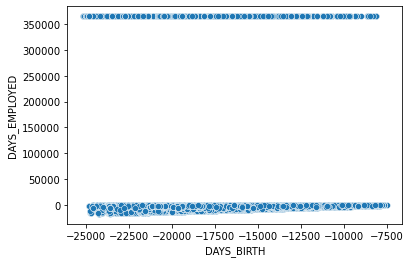

In [4]:
sns.scatterplot(data = df, x='DAYS_BIRTH', y= 'DAYS_EMPLOYED')

In [5]:
employ = df[df['DAYS_EMPLOYED']<0]

In [7]:
employ['DAYS_EMPLOYED']=employ['DAYS_EMPLOYED']*-1

C:\Users\HP\AppData\Local\Temp/ipykernel_2084/3177881055.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  employ['DAYS_EMPLOYED']=employ['DAYS_EMPLOYED']*-1


In [9]:
employ['DAYS_BIRTH']=employ['DAYS_BIRTH']*-1

C:\Users\HP\AppData\Local\Temp/ipykernel_2084/2512682252.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  employ['DAYS_BIRTH']=employ['DAYS_BIRTH']*-1


In [10]:
employ[['DAYS_BIRTH', 'DAYS_EMPLOYED']]

,DAYS_BIRTH,DAYS_EMPLOYED
0,12005,4542
1,12005,4542
2,21474,1134
3,19110,3051
4,19110,3051
...,...,...
438547,10966,2704
438548,12569,2095
438553,15939,3007
438554,8169,372


<AxesSubplot:xlabel='DAYS_BIRTH', ylabel='DAYS_EMPLOYED'>

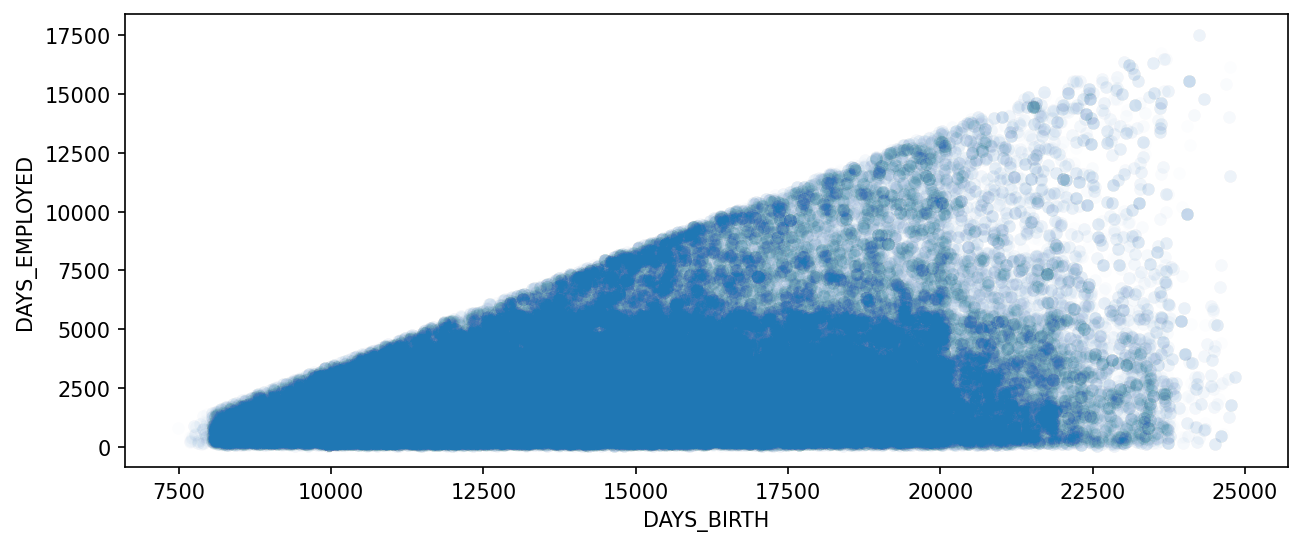

In [18]:
plt.figure(figsize=(10,4), dpi = 150)
sns.scatterplot(data = employ, x='DAYS_BIRTH', y='DAYS_EMPLOYED',
               alpha = 0.01, linewidth = 0)

In [26]:
df['years'] = (-1*df['DAYS_BIRTH']/365).round(2)

<AxesSubplot:xlabel='years', ylabel='Count'>

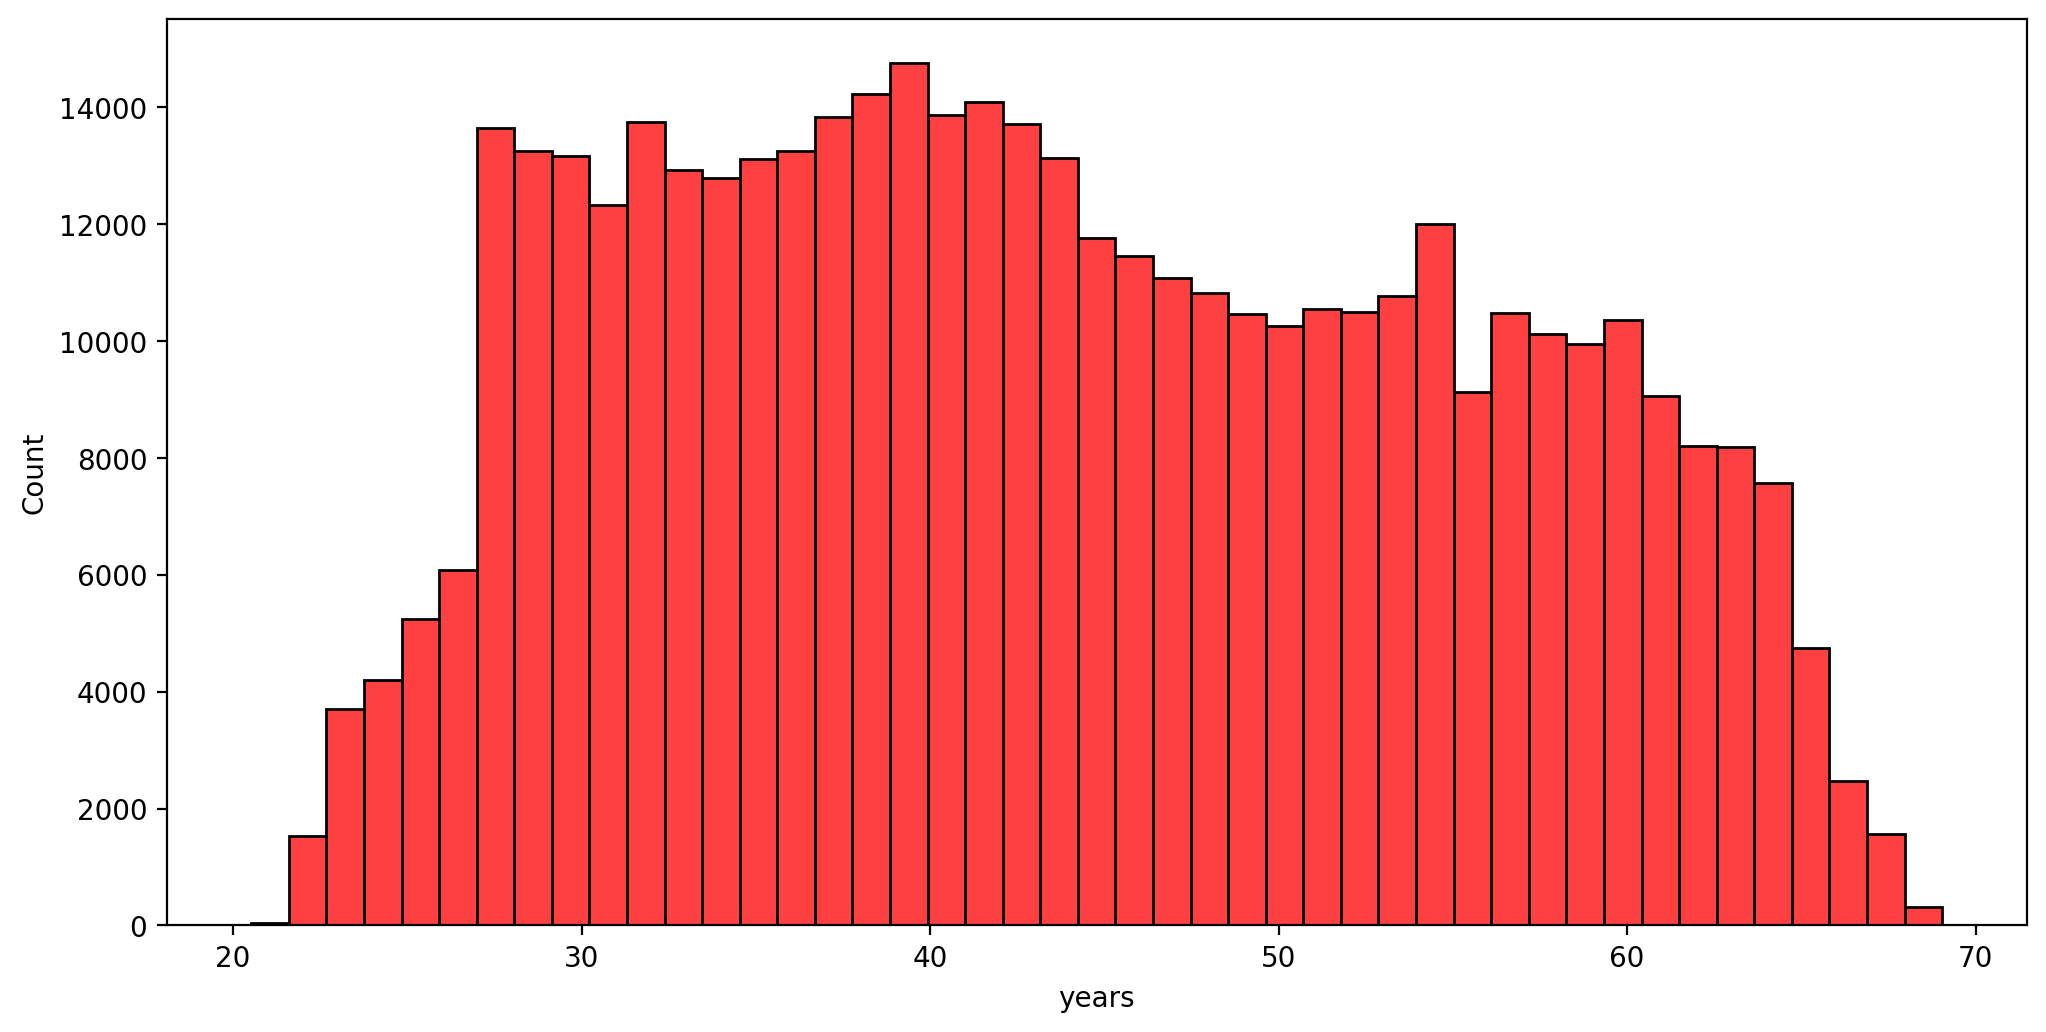

In [31]:
plt.figure(figsize = (12, 6), dpi = 200)
sns.histplot(data = df, x='years', bins = 45, color='red')

In [34]:
len(df)

438557

In [35]:
BUTTOM_HALF_INCOME=df.nsmallest(n=len(df)//2, columns= 'AMT_INCOME_TOTAL')

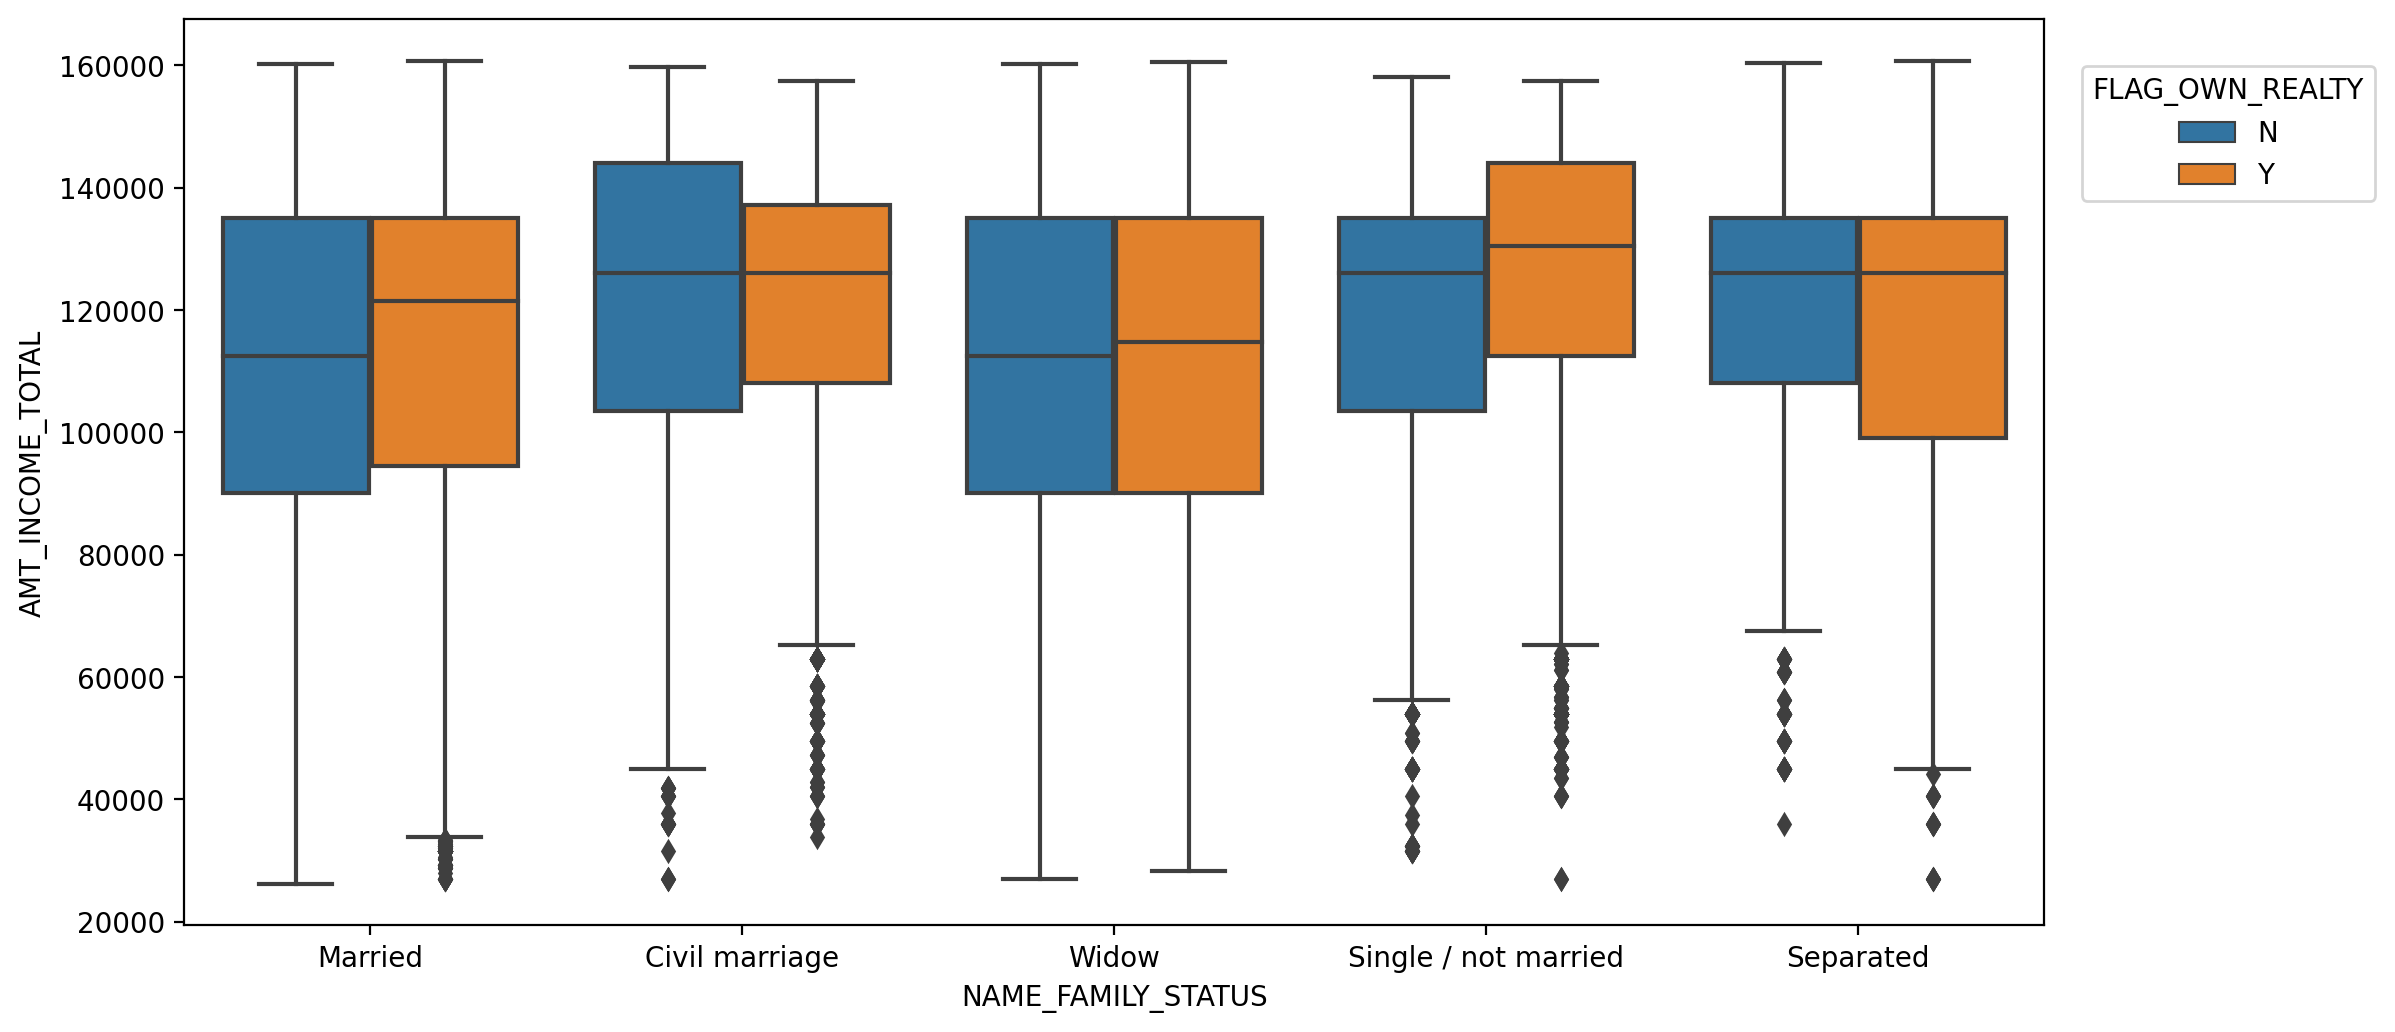

In [44]:
plt.figure(figsize = (12,6), dpi=200)

sns.boxplot(data =BUTTOM_HALF_INCOME, y= 'AMT_INCOME_TOTAL', x='NAME_FAMILY_STATUS',
           hue = 'FLAG_OWN_REALTY')
plt.legend(loc=(1.02, 0.8), title = 'FLAG_OWN_REALTY')